![Title](Images/cisco.png)

#  Lab - Internet Meter Visualization

### Objectives
<li>**Part 1: Clean and Analyze Data **</li>
<li>**Part 2: Visualize Data **</li>
### Scenario/Background
In this lab, you will learn how to use the `pandas` library to perform the  preliminary steps that are needed before perfoming any data analysis. This includes removing missing values, changing the format of data, and performing preliminary statistical analysis. 
After cleaning the data, you will use `matplotlib` for data exploration and visualization.

### Required Resources
* 1 PC with Internet access
* Raspberry Pi version 2 or higher
* Python libraries: datetime, csv, subprocess, pandas, numpy
* Datafiles: data_long.csv

## Part 1: Clean and Analyze Data

It is sometimes said that machine learning practitioners spend 80% of their time cleaning data. While this claim is possibly an exaggeration, it is true that data cleaning is a fundamental task, necessary to ensure the success of a machine learning project. As in many other lines of work, the law of 'garbage in, garbage out' does apply. It is simply not possible to do meaningful data analysis on dirty data. 

#### Step 1: Clean the data.

Load data from the file `rpi_data_compact.csv`. This file contains measurements of internet speed, acquired during the lab Internet_Speed_Data_Acquisition. In particular, the focus is on three quantities: ping time (ms), download speed (Mbit/s), and upload speed (Mbit/s). 

###### a) Read data from `rpi_data_compact.csv`.

Read the `./Data/rpi_data_compact.csv` file into a Pandas dataframe called `df_compact` and inspect the first three rows of this dataframe using `df.head`. 

In [6]:
# Code Cell 1
import pandas as pd
import numpy as np

In [7]:
# Code Cell 2
# Import data from csv file, and visualize the first rows
#df_compact = 
#df_compact.?()
## 
df_compact = pd.read_csv("./Data/rpi_data_compact.csv")
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


###### b) Remove unwanted columns.

As you may have noticed, the dataframe `df_compact` has an extra column. Use the command `df.drop` to remove this column. Look at the Internet_Speed_Data_Acquisition lab for help.

In [8]:
# Code Cell 3
# Remove extra index columns
df_compact.drop(["Unnamed: 0"], inplace=True, axis=1)
df_compact.head(3)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25


###### c) Remove  `NaNs`.

A common issue that affects data quality is the presence of `NaN` values. These can make data analysis functions abruptly terminate the calculation, throw an error, or produce incorrect results. Typically, NaN values represent a piece of information that should be contained in, but is missing from, the dataset. 
In this example, `NaN` values in `df_compact` may represent measurements where the Internet connection fell, or queries from the Raspberry Pi that the `Speedtest.net` server failed to answer. The code  below finds out how many `NaN` values are contained in our dataframe. 

First, go to http://pandas.pydata.org/pandas-docs/version/0.14.1/index.html and search for `isnull` in the search box. ![Image](Images/pandas_screenshot.png)

The documentation of the `isnull` function is a little difficult to understand. Fortunately, the Jupyter interactive interface allows us to call this function and quickly examine its output.

In [9]:
# Code Cell 4
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()


<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


The outcome of the `isnull` function is a new data frame that contains a `True` of `False` if the corresponding element of the `DataFrame` is `NaN` or not. Using the function `sum` on this `DataFrame` will automatically convert the values `True` into 1s and `False` into 0s.  

In [10]:
# Code Cell 5
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

The resulting `NaN_per_column` is a `pandas` `Series` object, that can be thought of as a single column of `DataFrame` (a `DataFrame` is actually a dict of `Series`, where the keys are the column names). A `Series` object contains almost all of the functionalities of a `DataFrame`. 
Use the `sum` function on the `Nan_per_column Series` and display the outcome.

In [11]:
# Code Cell 6
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

It is possible to concatenate all this instruction in one line, as follows:

In [12]:
# Code Cell 7
df_compact.isnull().sum().sum()

23

Compute the number of missing values as a percentage of all the elements in the dataframe (round the result to the second decimal using `numpy.round` https://docs.scipy.org/doc/numpy/reference/generated/numpy.round_.html) 

Use the `pandas` function `dropna` to remove `NaN` values from `df_compact`.

In [13]:
# Code Cell 8
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct)) #EDL : moved parenthesis

The DataFrame contains : 23 NaNs, equal to 0.6765 of the measurements


The function `dropna`, if called with only default parameters, removes all the rows of a `DataFrame` if any of its values is `NaN'. 

In [14]:
# Code Cell 9
# Remove NaN values
df_compact_clean = df_compact.dropna()

Compare the length of the values before and after using `dropna`. Do you notice something odd? Why?

In [15]:
# Code Cell 10
print(len(df_compact))
print(len(df_compact_clean)) 

680
673


###### d) Change values format.

The columns for ping, upload, and download in the dataframe `df_compact` contain numerical values. It is therefore reasonable to expect that they all share one datatype, for example `float64`. This, however, is not the case, as it can be detected using `dtypes`: 

In [16]:
# Code Cell 11
# Ping and Download are not floats
df_compact.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

Use the Python function `float()` to convert a string value into a into `float` format.

In [17]:
# Code Cell 12
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


Now convert all the values of the columns 'Ping (ms)' and 'Download (Mbit/s)' into float. Hint: use `apply` and `lambda`. For help, look at the Internet_Speed_Data_Acquisition lab.

In [18]:
# Code Cell 14
# this disables a notebook warning that is not relevant for our use case
pd.options.mode.chained_assignment = None

# Convert Ping and Download to float
#df_compact_clean['Ping (ms)_float'] = ...
#df_compact_clean['Download (Mbit/s)_float'] = ...


#Check that the types have been successfully converted
# ...

##
df_compact_clean['Ping (ms)_float'] = df_compact_clean["Ping (ms)"].apply(lambda x: float(x))
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean["Download (Mbit/s)"].apply(lambda x: float(x))

df_compact_clean.dtypes

Ping (ms)                   object
Download (Mbit/s)           object
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

Now, remove the original `Ping (ms)` and `Download (Mbit/s)` columns, and rename the new `Ping (ms)_float` and `Download (Mbit/s)_float` to `Ping (ms)` and `Download (Mbit/s)`. Use `df.drop` and `df.rename`, like in the  Internet_Speed_Data_Acquisition lab.

In [19]:
# Code Cell 15
# Remove the original 'Ping (ms)' and 'Download (Mbit/s)' columns
df_compact_clean.drop(["Ping (ms)", "Download (Mbit/s)"], inplace=True, axis=1)

# Rename the new 'Ping (ms) float' and 'Download (Mbit/s) float ' to Ping (ms)' and 'Download (Mbit/s)
df_compact_clean.rename(columns={"Ping (ms)_float":"Ping (ms)", "Download (Mbit/s)_float":"Download (Mbit/s)"},\
                    inplace=True)

In [20]:
# Code Cell 16
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


Before saving the `DataFrame`, it makes sense to reposition `Upload` as the last column. This can be achieved using the `reindex` function.

In [21]:
# Code Cell 17
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']);
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


Now that the dataset is finally clean, store it in a csv file and rename it.

In [22]:
# Code Cell 18
# Let's save the new cleaned dataframe to a csv
df_compact_clean.to_csv('./rpi_data_processed.csv', index=False)

df_clean = df_compact_clean

#### Step 2:  Basic statistics.

New data requires not only cleaning, but also a good deal of getting used to. When you start a data analyis project, it is worthwhile to invest effort in exploring and calculating some basic statistical properties of the data. This entails computing averages, standard deviations, and correlations. 

######  a) Calculate mean and standard deviation using Pandas.

The mean and the standard deviation of all the columns of a `DataFrame` can be computed using `mean()` and `std()` .
Look for them in the `pandas` library documentation and apply them to the `df_clean DataFrame`  

Quote the results as `quantity = mean ± standard_deviation`. Do not forget to include the units of measurement associated with each quantity. 

In [23]:
# Code Cell 19
# Compute mean and std for all the columns of df_compact
# SOLUTION:
# means = ...
# stands = ...

means = df_clean.mean()
stands = df_clean.std()

# Place mean and std for each column in a tuple
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


###### b) Calculate min and max deviation using Pandas.

Search in the `pandas` library documentation for how to compute the minimum and the maximum values for all the columns in the `DataFrame`.

In [24]:
# Code Cell 23
# Compute max and min for all the columns of df_compact
mins = df_clean.min()
maxs = df_clean.max()

# Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

# Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


###### c) Use the `pandas`  `describe` function.
Execute the following line of code. Notice how much time the `pandas` library can save you with even a single line of code!   

In [25]:
# Code Cell 24
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


###### d) Use `argmin`, `argmax` and `iloc`.

Let's assume you would like to have a computer script that automatically emails status reports to your internet provider. The reports would have to include the date and time corresponding to the minimum internet speed. The temporal information would allow the internet provider to accurately identify the cause behind the slow connection you observed. 

Using the `pandas` `argmin` and `argmax` functions, find dates and times corresponding to the longest and shortest ping time, the lowest and highest download speed, and the lowest and highest upload speed.

In [26]:
# Code Cell 25
# Find the min and max ping time
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The 

The `argmin` and `argmax` functions return an index relative to a the `Dataframe` rows. To access a specific row using this index, use `iloc`.

In [27]:
# Code Cell 26
# Create a small DataFrame and access its rows using iloc

# A pandas DataFrame can be initialized passing a dict as a parameter to the constructor pd.DataFrame(). 
# The key will represent the column, the values the rows.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [31]:
# Code Cell 27
# To access the field_1 of the first row using iloc()
df.iloc[1]['field_1']

0    0
1    1
Name: field_1, dtype: int64

Use the indices computed using `argmax` and `argmin` in combination with `iloc` to visualize the `Date` and the `Time` 
of the maximum/mimimum Ping, Download, and Upload.

In [28]:
# Code Cell 28
#Print the corresponding Date and Time
#print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[..., 
#                                                        df_clean.loc[...))

print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[df_clean['Ping (ms)'].argmin()]["Date"], 
                                                       df_clean.loc[df_clean['Ping (ms)'].argmin()]["Time"]))

#print('Download measure reached minimum on {} at {}'.format(...

#print('Upload measure reached minimum on ...

#print('Ping measure reached maximum on ... 

#print('Download measure reached maximum on ...

#print('Upload measure reached maximum on ...

Ping measure reached minimum on 2016-11-24 at 15:26:20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  import sys


###### e) Create a correlation.

It is useful to analyze if the speed of download tends to increase and decrease together with the speed of upload. The reasoning behind this would be that network usage and technical issues ought to affect download and upload equally. 

In this scenario, download and upload speeds would be called *positively correlated*. This means that faster download and upload would typically occur together. This would refer to the general trend, but instances of fast download with slow upload would still be possible. 

On the other hand, you may infer that a higher download speed implies a lower upload speed, and vice-versa. In this case, the argument would be that the internet line can only support a limited amount of information being exchanged. Download and upload would then compete, and keep each other 'in check'.

In this scenario, download and upload speeds would be called *negatively correlated*. This means that download would typically be faster when upload is slower, and vice-versa. As before, this would refer to a trend, so that simultaneous good download and upload speeds would still be possible. 

To complete the picture, the time of ping may be positively or negatively correlated with either upload or download. It is then natural to think of a table, where each quantity is compared with all others. Such tables are well-known mathematical objects, and are dubbed *correlation matrices*. 

Use the `pandas` function `corr` to derive the correlation matrix of ping, upload, and download. Store the result in a variable called `df_corr`. 

In [29]:
# Code Cell 29
# Are these variables correlated?
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [30]:
# Code Cell 30
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.045626110258379995
Correlation coefficient between ping and upload: -0.4630987138300184
Correlation coefficient between upload and download: 0.08368996933725129


These numbers answer the  questions on the 'relationship' between ping, download, and upload. Perfect positive correlation yields a value of +1, whereas perfect negative correlation yields a value of -1. Yet, the correlations between download and ping, and between download and upload are close to zero. Moreover, the correlation between upload and ping is small. This leads to the conclusion that the three quantities are, in fact,  mutually **uncorrelated**. 



## Part 2: Visualize Data

As the proverb goes, 'A picture is worth a thousand words'. Informative, meaningful, and intuitive graphs play a crucial role in the exploration of data. Plots are useful in the initial stages of a project, and well beyond that. Graphs are a great way to present the results and conclusions of your work in front of an audience.

Python has a comprehensive library for making plots, called `Matplotlib`. As an additional learning resource, it is certainly worth taking a look at the official Matplotlib [documentation](http://matplotlib.org/index.html), and in particular at the numerous [examples](http://matplotlib.org/examples/index.html). 

#### Step 1: Create a first visualization of the Internet Speed Data.

Visualize the content of the `df_clean` `DataFrame`.

###### a) Import Matplotlib.

In [37]:
# Code Cell 31
import matplotlib.pyplot as plt
# The following allows your Jupyter notebook to create plots inside a cell
%matplotlib inline 

###### b) Plot Internet speed stats.

Based on what you learned in the SF_Crime_Data lab, generate a plot containing three lines: 1. ping (ms) as a function of time, 2. upload (Mbit/s) as a function of time, and 3. download (Mbit/s) as a function of time. Use the legend() function to add a legend to your graph, but do not worry about labelling the axes. We will work out how to do that in a later task.  

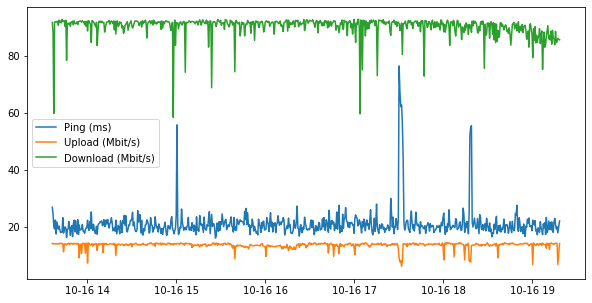

In [40]:
# Code Cell 32
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])


# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
#ax.plot(...
#ax.plot(...
##
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
##

# Insert legend
ax.legend()
plt.show()

###### c) Change the linestyle.
Because ping measurements include large and abrupt variations, they are perhaps better visualized using dots. Within the command `ax.plot(...)` for diplaying ping data, specify that these measurements are represented as dots. (Most of the code, here, can be recycled from the previous task.)

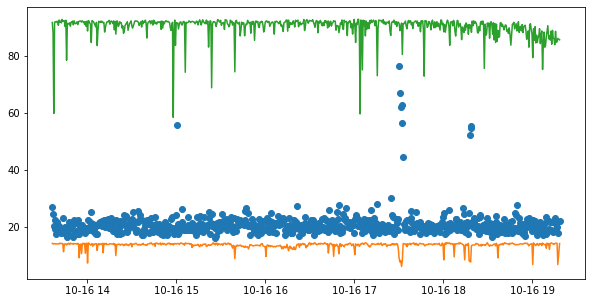

In [39]:
# Code Cell 33
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves. Ping data 
# is visualized using dots
t = pd.to_datetime(df_clean['Time'])

#ax.plot(...
#ax.plot(...
#ax.plot(...
##
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
#ax.plot(...
#ax.plot(...
##
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
##

# Insert legend

###### d) Add axis labels.

A plot without axis labels, and perhaps a title, is difficult to understand, as one cannot know for sure which quantities are being depicted. Make the above graph compliant with standard scientific practice by adding axis labels and a title. Specify a fontsize of about 16, so that title and labels are printed nice and clear. 

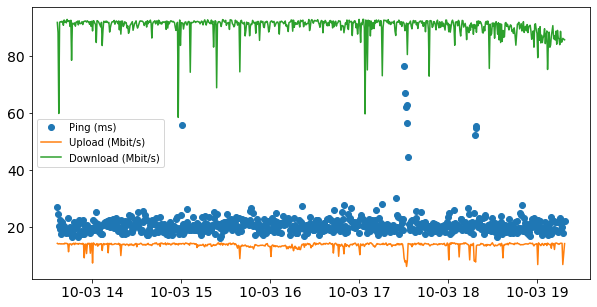

In [40]:
# Code Cell 35
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert legend
ax.legend()

# Add axis labels and title
#ax.set_xlabel(...
#ax.set_ylabel(...
#ax.set_title(...

# Change tick size
ax.tick_params(labelsize=14)

###### e)  Change the plot theme.
Use the `'fivethirtyeight'` [style context](http://matplotlib.org/examples/style_sheets/plot_fivethirtyeight.html) to make the previous graph more visually appealing. To do this, add the row with the `with` statement to your code, before calling the `Matplotlib` functions.

In [ ]:
# Code Cell 36
# Use a style context
#with ...

    # Initialise figure
    #fig, ax = 
    
    # Plot ping as a function of time
 
    # Add axis labels and title
    
    # Change tick size

###### f) Create a Histogram.

A histogram is a graphical representation of the frequency of the values of numerical data. Examine the code below. An additional level of complexity is the use of subplots to display the histograms side-by-side. 

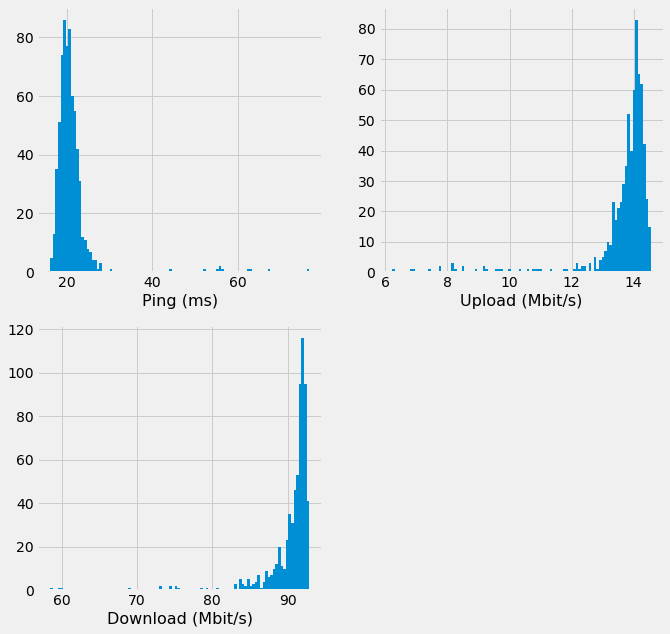

In [41]:
# Code Cell 37
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>